In [19]:
from dotenv import load_dotenv
load_dotenv()

True

In [20]:
from langgraph.graph import END, START, StateGraph, MessagesState
from langchain_openai import ChatOpenAI
from langchain_core.tools import tool
from langgraph.prebuilt import ToolNode
from typing import Literal

In [21]:
@tool
def get_weather(location: str):
    """Call to get the current weather."""
    if location.lower() in ["chennai"]:
        return "It's 15 degrees Celsius and cloudy."
    else:
        return "It's 32 degrees Celsius and sunny."

In [22]:
get_weather.invoke(input={"location": "chennai"})

"It's 15 degrees Celsius and cloudy."

In [23]:
tools = [get_weather]
model = ChatOpenAI(model="gpt-4o").bind_tools(tools)

In [24]:
model.invoke("hello")

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 45, 'total_tokens': 56, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_432e014d75', 'finish_reason': 'stop', 'logprobs': None}, id='run-ece0ddec-4aa4-4285-851c-345050e5ab63-0', usage_metadata={'input_tokens': 45, 'output_tokens': 11, 'total_tokens': 56, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [25]:
model.invoke("How is the weather in chennai?")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_hfptMa3r7nLJDEGCot4S4Nb5', 'function': {'arguments': '{"location":"chennai"}', 'name': 'get_weather'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 52, 'total_tokens': 68, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_432e014d75', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-b8c4960d-6bf1-48e1-910d-12d8ce6ff2a5-0', tool_calls=[{'name': 'get_weather', 'args': {'location': 'chennai'}, 'id': 'call_hfptMa3r7nLJDEGCot4S4Nb5', 'type': 'tool_call'}], usage_metadata={'input_tokens': 52, 'output_tokens': 16, 'total_tokens': 68, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasonin

In [26]:
def call_model(state: MessagesState):
    messages = state["messages"]
    response = model.invoke(messages)
    return {"messages": [response]}


def should_continue(state: MessagesState) -> Literal["tools", END]:
    messages = state["messages"]
    last_message = messages[-1]
    if last_message.tool_calls:
        return "tools"
    return END

In [27]:
workflow = StateGraph(MessagesState)
tool_node = ToolNode(tools)

workflow.add_node("agent", call_model)
workflow.add_node("tools", tool_node)

In [28]:
workflow.add_edge(START, "agent")

workflow.add_conditional_edges(
    "agent",
    should_continue,
)
workflow.add_edge("tools", "agent")

In [29]:
graph = workflow.compile()

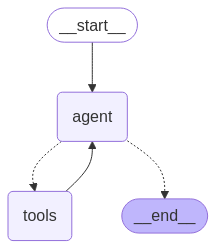

In [15]:
from IPython.display import Image, display
from langchain_core.runnables.graph import MermaidDrawMethod

display(
    Image(
        graph.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)

In [30]:
from langchain_core.messages import HumanMessage

messages1 = [HumanMessage(content="Hello, how are you?")]
messages2 = [HumanMessage(content="How is the weather in chennai?")]

In [31]:
graph.invoke({"messages": messages1})

{'messages': [HumanMessage(content='Hello, how are you?', additional_kwargs={}, response_metadata={}, id='35f05cb7-c9b1-45bc-abb6-9a5de42b88a1'),
  AIMessage(content="Hello! I'm just a computer program, so I don't have feelings, but I'm here to help you. How can I assist you today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 30, 'prompt_tokens': 50, 'total_tokens': 80, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_432e014d75', 'finish_reason': 'stop', 'logprobs': None}, id='run-e7f6da68-3a43-41f4-85b9-158700a142cc-0', usage_metadata={'input_tokens': 50, 'output_tokens': 30, 'total_tokens': 80, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}

In [32]:
graph.invoke({"messages": messages2})

{'messages': [HumanMessage(content='How is the weather in chennai?', additional_kwargs={}, response_metadata={}, id='228b729c-2bcd-4151-922b-9830e31f68d6'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_5BjljU3NH9KXq8MEndpvmT0c', 'function': {'arguments': '{"location":"chennai"}', 'name': 'get_weather'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 52, 'total_tokens': 68, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_432e014d75', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-5de1107e-9535-4d55-ab23-bcf9984aa22a-0', tool_calls=[{'name': 'get_weather', 'args': {'location': 'chennai'}, 'id': 'call_5BjljU3NH9KXq8MEndpvmT0c', 'type': 'tool_call'}], usage_metadata={'i

In [33]:
graph.invoke(
    {
        "messages": [
            HumanMessage(content="What would you recommend to do in that city than?")
        ]
    }
)

{'messages': [HumanMessage(content='What would you recommend to do in that city than?', additional_kwargs={}, response_metadata={}, id='9e1ee911-617f-40b5-bbd7-afc7cf5ea238'),
  AIMessage(content="Could you please specify which city you're asking about?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 12, 'prompt_tokens': 55, 'total_tokens': 67, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_432e014d75', 'finish_reason': 'stop', 'logprobs': None}, id='run-c1ef6cfc-1f6c-4e58-bbac-dd3812afa725-0', usage_metadata={'input_tokens': 55, 'output_tokens': 12, 'total_tokens': 67, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}

### Add Memory to chatbot

In [34]:
from langgraph.checkpoint.memory import MemorySaver

checkpointer = MemorySaver()

In [35]:
workflow = StateGraph(MessagesState)

workflow.add_node("agent", call_model)
workflow.add_node("tools", tool_node)

workflow.add_edge(START, "agent")

workflow.add_conditional_edges(
    "agent",
    should_continue,
)
workflow.add_edge("tools", "agent")

graph = workflow.compile(checkpointer=checkpointer)

In [36]:
graph.invoke(
    {"messages": [HumanMessage(content="How is the weather in chennai?")]},
    config={"configurable": {"thread_id": 1}},
)

{'messages': [HumanMessage(content='How is the weather in chennai?', additional_kwargs={}, response_metadata={}, id='599f5824-1ae1-4349-8dda-182f7a67558e'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_AaAe6doa2RQXmZylEFJ3O710', 'function': {'arguments': '{"location":"chennai"}', 'name': 'get_weather'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 52, 'total_tokens': 68, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_432e014d75', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-0fe4a509-34dd-4053-920a-30eb0674d547-0', tool_calls=[{'name': 'get_weather', 'args': {'location': 'chennai'}, 'id': 'call_AaAe6doa2RQXmZylEFJ3O710', 'type': 'tool_call'}], usage_metadata={'i

In [37]:
graph.invoke(
    {
        "messages": [
            HumanMessage(content="What would you recommend to do in that city than?")
        ]
    },
    config={"configurable": {"thread_id": 1}},
)

{'messages': [HumanMessage(content='How is the weather in chennai?', additional_kwargs={}, response_metadata={}, id='599f5824-1ae1-4349-8dda-182f7a67558e'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_AaAe6doa2RQXmZylEFJ3O710', 'function': {'arguments': '{"location":"chennai"}', 'name': 'get_weather'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 52, 'total_tokens': 68, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_432e014d75', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-0fe4a509-34dd-4053-920a-30eb0674d547-0', tool_calls=[{'name': 'get_weather', 'args': {'location': 'chennai'}, 'id': 'call_AaAe6doa2RQXmZylEFJ3O710', 'type': 'tool_call'}], usage_metadata={'i